### ЛР №2 Вариант 14
---
<img width="50%" src="https://lh3.googleusercontent.com/-LJ1KM25WJtssTx-Vp_coCcK-u9BEiPXWxZkhJYXZPHSqRfvi5xqs6bojB5zShouVpNXgWpPiBd2n25EWiykXQSEcToj9jOcFL8egO5csh7xpqLYy5br_VSVlshIY8a3b2CmnEET0sIuU9fe0G_zS0YoiZaU8DVbvVgflPFPbfoEXs8VbwBhPImwpUwKB96ADG7pTWjHT0rCPAlMj4snSU0WLfk1qSu5QCR3c87NWTTZBIl0BQj8RqN8O6q4_4Kcgi-0pINFd-GHXTy98few02IIuG8O3KUBbGQLMw1FmEQBKl1UWEW4oe7TSHdo_3r5fwLSPpjOzdCalDP7Of94hvN-gLRggBRBer78VSIZ_ASjlE4d-jpofEFNOY8mF5JriTEIzPvav_-_RaMkun3VZO87UHyjQvkDBXV65ZC-VOwHcUlVcalw3Dg8BVK8UIqlbP2Krvg0qSAPtu3OZzgHVI6_zy3ii6HNv5KGnI9KQTnIvYvlP4hbNuegL1xcT6nwmTunQ8niWH2IVMOQHgCp_xAvrmDVZqv-RuB-LkGpcA2nfJzaTTfEUe46Ma7k_S5JSbsGuCZoGT6A2zpnPww4IIrlpegHDawSrxr-wFifxcqqGK4-zcpwxxpShPgBSKBMPoGi1oGVvKPegJRlq8CpLZbLdVMy9MJtPO6lNuX9RhMS093AwUHNWaqJ0fjI=w610-h979-no?authuser=0"/>

In [449]:
from random import random

import matplotlib.pyplot as plt
import numpy as np

L_BORDER = 'left_border'
R_BORDER = 'right_border'
F_DENSITY = 'density'


#### Этот класс только строит графики
<sub> написан чтобы устранить дублирование кода

In [450]:
class Plot:

    def __init__(self, x_label, y_label, data):
        self.x_label = x_label
        self.y_label = y_label
        self.params = data

    def density_hist(self):
        x, y = [self.params[L_BORDER][0]], [0]
        for i in range(len(self.params[L_BORDER])):
            x.append(self.params[L_BORDER][i])
            x.append(self.params[R_BORDER][i])
            y.append(self.params[F_DENSITY][i])
            y.append(self.params[F_DENSITY][i])
        x.append(self.params[R_BORDER][-1])
        y.append(0)
        plt.plot(x, y, label='average density')

    def polygon(self):
        a, b = self.params[L_BORDER], self.params[R_BORDER]
        p_x = [a[i] + (b[i] - a[i]) / 2 for i in range(len(a))]
        plt.plot(p_x, self.params[F_DENSITY], label='polygon')

    def theoretic_distribution(self, empiric_distribution, series):
        e_x = [-0.25]
        e_y = [0]

        for index in range(len(self.params[L_BORDER])):
            e_x.append(self.params[L_BORDER][index])
            e_x.append(self.params[R_BORDER][index])
            e_y.append(empiric_distribution[index])
            e_y.append(empiric_distribution[index])

        def Fy(y):
            return (4 / np.pi) * np.arctan(y)

        plt.plot(e_x + [e_x[-1], 1.2], e_y + [1, 1], label='empiric distribution')
        plt.plot(series, Fy(series), label='theoretical distribution')

    def show(self, title=''):
        plt.title(title)
        plt.grid(True, which='both', linestyle='--')
        plt.ylabel(f'{self.y_label}')
        plt.xlabel(f'{self.x_label}')
        plt.legend()
        plt.show()


In [451]:
def theoretic_density(y):
    def fy(y_i):
        return 4 / (np.pi * (1 + y_i ** 2))

    plt.plot(y, fy(y), label='theoretic density')


def get_empirical_points(n):
    a, b = 0, np.pi / 4
    series = np.around([np.tan(random() * (b - a) + a) for _ in range(0, n)], 3)
    series.sort()

    return series

#### Задание 1
---

In [452]:
def get_intervals_amount(n):
    return int(4 * np.log10(n)) if n > 100 else int(np.sqrt(n))


def get_average_density(l_b, r_b, series, delta):
    n = len([i for i in series if l_b < i < r_b])
    if r_b in series:
        n += 1

    return n / (len(series) * delta)


def get_equal_interval_data(series):
    intervals_amount = get_intervals_amount(len(series))
    interval_step = (series[-1] - series[0]) / intervals_amount
    a, b, f = [0], [], []
    for i in range(1, intervals_amount):
        a.append(series[0] + i * interval_step)
        b.append(a[-1])
        f.append(get_average_density(a[-2], b[-1], series, interval_step))
    b.append(a[-1] + interval_step)
    f.append(get_average_density(a[-1], b[-1], series, interval_step))
    return {L_BORDER: a, R_BORDER: b, F_DENSITY: f}

In [453]:
variation_series = get_empirical_points(1103)
equal_interval_data = get_equal_interval_data(variation_series)
plot_equal_interval = Plot('y', 'f*(y)', equal_interval_data)

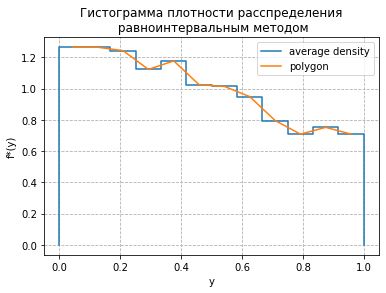

In [454]:
plot_equal_interval.density_hist()
plot_equal_interval.polygon()
plot_equal_interval.show('Гистограмма плотности расспределения\n равноинтервальным методом')

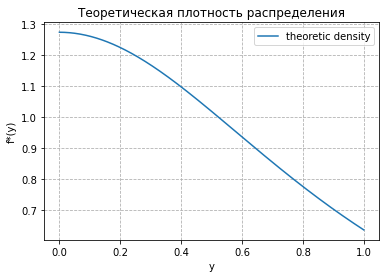

In [455]:
theoretic_density(variation_series)
plot_equal_interval.show('Теоретическая плотность распределения')

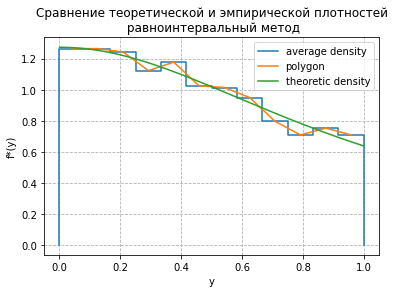

In [456]:
plot_equal_interval.density_hist()
plot_equal_interval.polygon()
theoretic_density(variation_series)
plot_equal_interval.show('Сравнение теоретической и эмпирической плотностей\n равноинтервальный метод')

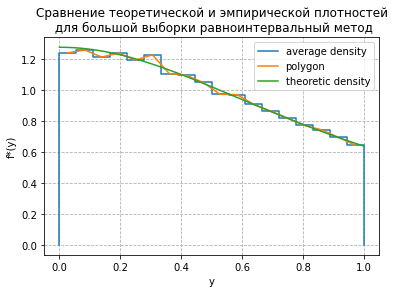

In [457]:
big_variation_series = get_empirical_points(50000)
big_plot = Plot('y', 'f*(y)', get_equal_interval_data(big_variation_series))
big_plot.density_hist()
big_plot.polygon()
theoretic_density(big_variation_series)
plot_equal_interval.show('Сравнение теоретической и эмпирической плотностей\n для большой выборки равноинтервальный метод')

In [458]:
step = equal_interval_data[L_BORDER][-1] - equal_interval_data[L_BORDER][-2]
empiric_dist = []
sum = 0
for i in equal_interval_data[F_DENSITY]:
    empiric_dist.append(sum)
    sum += i * step

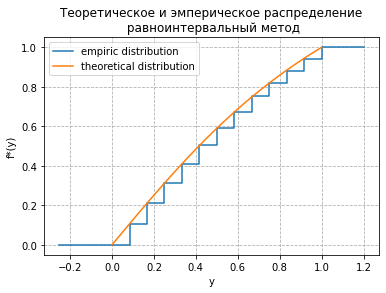

In [459]:
plot_equal_interval.theoretic_distribution(empiric_dist, variation_series)
plot_equal_interval.show('Теоретическое и эмперическое распределение\n равноинтервальный метод')

#### Задание 2
---

In [460]:
def get_equal_chance_data(series):
    n = len(series)
    intervals_amount = get_intervals_amount(n)
    amount_in_interval = n // intervals_amount

    a, b, f = [], [], []
    a.append(series[0])
    for i in range(1, intervals_amount):
        b.append((series[i * amount_in_interval] + series[i * (amount_in_interval + 1)]) / 2)
        a.append(b[-1])
        f.append(amount_in_interval / (n * (b[-1] - a[-2])))
    b.append(series[-1])
    f.append(amount_in_interval / (n * (b[-1] - a[-1])))

    return {L_BORDER: a, R_BORDER: b, F_DENSITY: f}

In [461]:
equal_chance_data = get_equal_chance_data(variation_series)
plot_equal_chance = Plot('y', 'f*(y)', equal_chance_data)

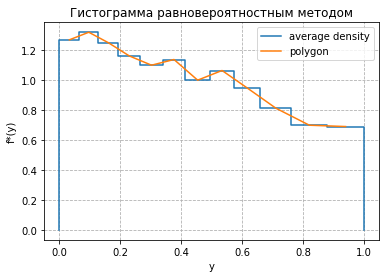

In [462]:
plot_equal_chance.density_hist()
plot_equal_chance.polygon()
plot_equal_chance.show('Гистограмма равновероятностным методом')

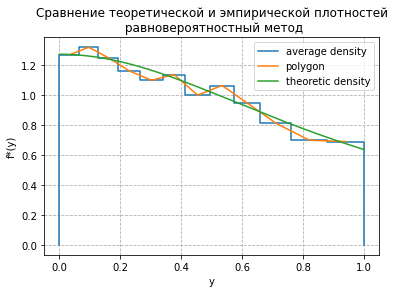

In [463]:
plot_equal_chance.density_hist()
plot_equal_chance.polygon()
theoretic_density(variation_series)
plot_equal_chance.show('Сравнение теоретической и эмпирической плотностей\n равновероятностный метод')

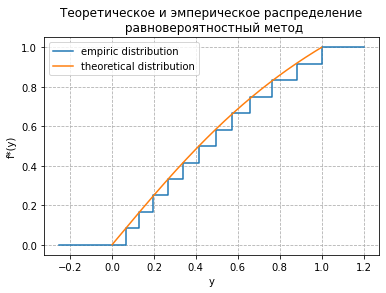

In [464]:
v = 1 / get_intervals_amount(len(variation_series))
empiric_dist = [i * v for i in range(len(equal_chance_data[F_DENSITY]))]
plot_equal_chance.theoretic_distribution(empiric_dist, variation_series)
plot_equal_chance.show('Теоретическое и эмперическое распределение\n равновероятностный метод')
